In [7]:
#correlation between SCI and GDP

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('data/combined.csv',encoding='latin-1',keep_default_na=False,na_values=['..','#N/A'])
df = df[df['gdp_user'].notna()]
df = df[df['gdp_fr'].notna()]

# add a column for absolute difference of GDP
df["abs_diff_gdp"] = abs(df['gdp_user'] - df['gdp_fr'])

# drop any rows if the absolute difference is 0; this is when a country was compared against itself
df.drop(df[df["abs_diff_gdp"] == 0].index, inplace = True) 
print(df)

# add a column for the log10(SCI)
df['scaled_sci'] = pd.to_numeric(df['scaled_sci'], errors='coerce')
df['SCI_log10'] = np.log10(df['scaled_sci'])

#df['abs_diff_gdp_log10'] = np.log10(df['abs_diff_gdp'])

      user_loc fr_loc  scaled_sci  migrants_from_fr      gdp_user  \
1           AE     AG        7764               NaN  43839.356350   
2           AE     AL        2836               NaN  43839.356350   
3           AE     AM        4174               NaN  43839.356350   
4           AE     AO        2954               NaN  43839.356350   
5           AE     AR         887               NaN  43839.356350   
...        ...    ...         ...               ...           ...   
34217       NA     VU        1711               NaN   5495.428836   
34218       NA     WS        1411               NaN   5495.428836   
34221       NA     ZA       88866            7872.0   5495.428836   
34222       NA     ZM      137582            2806.0   5495.428836   
34223       NA     ZW      326749           13413.0   5495.428836   

             gdp_fr  population_user  population_fr  literacyRate_user  \
1      16726.980810        9770529.0        97118.0                NaN   
2       5284.380184    

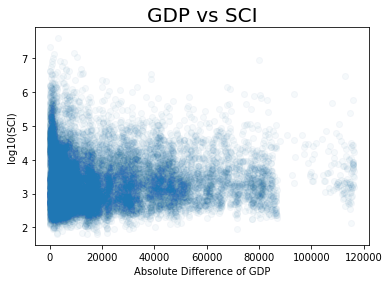

In [8]:


plt.scatter(df['abs_diff_gdp'], df['SCI_log10'], alpha = 0.02)
plt.xlabel('Absolute Difference of GDP')
plt.ylabel('log10(SCI)')
plt.title('GDP vs SCI', fontsize=20)
plt.show()